## Notebook Information

**Master in Quantum Computing - UNIR**

**Subject:** Quantum Computing

**Notebook Activity by:** Albert Nieto Morales

**Date:** 2023-11-27

---

*Note: This notebook is part of the Master's program in Quantum Computing at UNIR. The content focuses on Quantum Computing and was created by Albert Nieto. Please refer to the date for the latest update.*


# Quantum State Visualization with Qiskit

This Jupyter notebook explores the visualization of quantum states using Qiskit and Matplotlib. The code below includes the necessary imports for standard Qiskit libraries, visualization tools, and providers. Additionally, it sets up the IBM Quantum account to leverage IBM Quantum services for runtime execution.

## Code Highlights:

### Imports:
- `qiskit`: Standard Qiskit libraries for quantum computing.
- `qiskit.tools.jupyter`: Tools for Jupyter notebook integration.
- `qiskit.visualization`: Visualization tools for quantum circuits and states.
- `qiskit.quantum_info`: Quantum information tools for statevector manipulation.
- `qiskit.providers.aer`: Importing AerSimulator for local simulations.
- `qiskit_ibm_runtime`: Importing Qiskit Runtime services.

### Other Imports:
- `matplotlib.pyplot`: Matplotlib for general plotting.
- `numpy`: NumPy for numerical operations.
- `math`: Python math library.
- `colorsys`: Colorsys for color manipulation.

### Setting up IBM Quantum Account:
- `QiskitRuntimeService`: Establishing a connection to IBM Quantum services.

In [2]:
%pip install qiskit
%pip install qiskit-ibmq-provider
%pip install qiskit-aer


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import Statevector
from qiskit_ibm_provider import IBMProvider

# Importing providers
from qiskit.providers.aer import AerSimulator
from qiskit import Aer

# Other imports
import matplotlib.pyplot as plt
import numpy as np
import math
import colorsys

# Loading your IBM Quantum account(s)
IBMProvider.save_account('', overwrite=True)

# Setting up a Quantum Circuit

We are going to create a quantum circuit consisting of quantum and classical registers.

## Code Highlights:

1. **Quantum and Classical Registers:**
   - `QuantumRegister(4, 'q')`: Creation of a quantum register named 'q' with 4 qubits.
   - `ClassicalRegister(1, 'c')`: Creation of a classical register named 'c' with 1 bit.

2. **Circuit Building:**
   - Hadamard gates (`circuit.h()`) applied to qubits 1, 2, 3, and 0.
   - Pauli-X (`circuit.x()`) and Pauli-Y (`circuit.y()`) gates applied to specific qubits.
   - Phase gate (`circuit.p()`) applied to qubit 3 with an angle of π/2.
   - Successive Pauli-Y and Pauli-Z gates applied to qubit 3.# Quantum Circuit Exploration with Qiskit

In [4]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.x(qreg_q[2])
circuit.y(qreg_q[1])
circuit.x(qreg_q[3])
circuit.y(qreg_q[2])
circuit.p(np.pi / 2, qreg_q[3])
circuit.y(qreg_q[3])
circuit.z(qreg_q[3])

Let's print a diagram of a representation of the quantum gates and the operations applied to each qubit.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


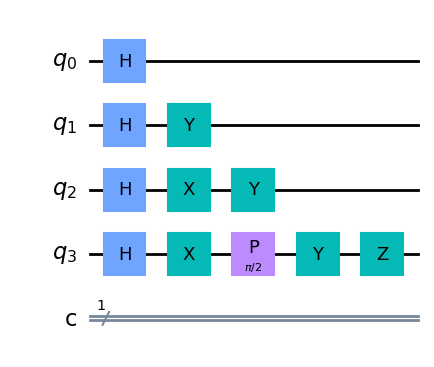

In [5]:
circuit.draw('mpl')

## Execution Steps:

1. **Selecting the Simulator Backend:**
   - We choose the statevector simulator backend from Aer to simulate the quantum circuit.

2. **Executing the Quantum Circuit:**
   - The circuit is run on the selected simulator backend.

3. **Analyzing the Results:**
   - The result object (`result`) provides detailed information about the simulation.
   - The job status (`status`) reflects the current state of the job (e.g., running, completed).
   - The state vector (`sv`) is obtained from the result, representing the final quantum state after the circuit execution.

In [6]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution 
job = backend.run(circuit)

# Return the result object of the job
result = job.result()

# Return the status of the job
status = job.status()

# Get state vector from result
sv = result.get_statevector()

# Classes

The code defines three classes for quantum state visualization:

## 1. QuantumError Class

**Purpose:**
- The `QuantumError` class is designed to handle quantum-related errors as a custom exception.

**Example Usage:**
```python
try:
    # Some quantum operation
except QuantumError as e:
    print(f"Quantum error occurred: {e}")
```

In [7]:
class QuantumError(Exception):
    """
    Custom exception class for quantum-related errors.
    """
    def __init__(self, message="Quantum error"):
        """
        Initialize the QuantumError instance.

        Parameters:
        - message (str): Error message. Default is "Quantum error".
        """
        super().__init__(message)

## 2. CircleNotation Class:

**Purpose:**
The CircleNotation class is designed for creating annotated circles on a matplotlib Axes. 

**Attributes:**
- Various default values for properties like line length, color, and circle dimensions.

**Methods:**
- `draw_all(self)`: Draws all circle sets on the Axes.

**Example Usage:**
```python
cn = CircleNotation(label, inner_color, outer_color, angle, x_offset, y_offset, len_outer_circle, len_inner_circle)
cn.draw_all()
```

In [8]:
import matplotlib.pyplot as plt
import numpy as np


class CircleNotation:
    """
    CircleNotation class for creating annotated circles on a matplotlib Axes.

    Parameters:
    - label (list): List of labels for each circle.
    - inner_color (list): List of colors for the inner circles.
    - outer_color (list): List of colors for the outer circles.
    - angle (list): List of angles for drawing lines.
    - x_offset (list): List of x-coordinates for circle centers.
    - y_offset (list): List of y-coordinates for circle centers.
    - len_outer_circle (list): List of radii for outer circles.
    - len_inner_circle (list): List of radii for inner circles.
    - line_length (float, optional): Length of lines drawn from circles. Default is DEFAULT_LINE_LENGTH.
    - line_color (str, optional): Color of the lines. Default is DEFAULT_LINE_COLOR.
    - omit_line (list, optional): List of booleans indicating whether to omit lines for each circle. Default is DEFAULT_OMIT_LINE.

    Attributes:
    - DEFAULT_LINE_LENGTH (float): Default length of lines drawn from circles.
    - DEFAULT_LINE_COLOR (str): Default color of the lines.
    - DEFAULT_CIRCLE_COLOR (str): Default color of circles.
    - DEFAULT_TEXT_COLOR (str): Default color of text.
    - DEFAULT_HEAD_WIDTH (float): Default width of arrowhead in lines.
    - DEFAULT_HEAD_LENGTH (float): Default length of arrowhead in lines.
    - DEFAULT_FONT_SIZE (int): Default font size of text.
    - DEFAULT_TEXT_DISPLACEMENT (float): Default vertical displacement of text.
    - DEFAULT_OMIT_LINE (bool): Default value indicating whether to omit lines for each circle.
    - DEFAULT_CIRCLE_FILL (bool): Default value indicating whether circles should be filled.
    - DEFAULT_X_OFFSET (float): Default x-coordinate for circle centers.
    - DEFAULT_Y_OFFSET (float): Default y-coordinate for circle centers.
    - DEFAULT_CIRCLE_RADIUS (float): Default radius of circles.
    - DEFAULT_ANGLE (float): Default angle for drawing lines.
    - DEFAULT_TEXT_HA (str): Default horizontal alignment of text.
    - DEFAULT_TEXT_VA (str): Default vertical alignment of text.
    """

    DEFAULT_LINE_LENGTH = 1
    DEFAULT_LINE_COLOR = "black"
    DEFAULT_CIRCLE_COLOR = "black"
    DEFAULT_TEXT_COLOR = "black"
    DEFAULT_HEAD_WIDTH = 0
    DEFAULT_HEAD_LENGTH = 0
    DEFAULT_FONT_SIZE = 12
    DEFAULT_TEXT_DISPLACEMENT = -1.35
    DEFAULT_OMIT_LINE = False
    DEFAULT_CIRCLE_FILL = False
    DEFAULT_X_OFFSET = 0
    DEFAULT_Y_OFFSET = 0
    DEFAULT_CIRCLE_RADIUS = 1
    DEFAULT_ANGLE = 0
    DEFAULT_TEXT_HA = "center"
    DEFAULT_TEXT_VA = "center"

    def __init__(
        self,
        label,
        inner_color,
        outer_color,
        angle,
        x_offset,
        y_offset,
        len_outer_circle,
        len_inner_circle,
        line_length=DEFAULT_LINE_LENGTH,
        line_color=DEFAULT_LINE_COLOR,
        omit_line=DEFAULT_OMIT_LINE,
    ):
        """
        Initialize CircleNotation instance.

        Parameters:
        - label (list): List of labels for each circle.
        - inner_color (list): List of colors for the inner circles.
        - outer_color (list): List of colors for the outer circles.
        - angle (list): List of angles for drawing lines.
        - x_offset (list): List of x-coordinates for circle centers.
        - y_offset (list): List of y-coordinates for circle centers.
        - len_outer_circle (list): List of radii for outer circles.
        - len_inner_circle (list): List of radii for inner circles.
        - line_length (float, optional): Length of lines drawn from circles. Default is DEFAULT_LINE_LENGTH.
        - line_color (str, optional): Color of the lines. Default is DEFAULT_LINE_COLOR.
        - omit_line (list, optional): List of booleans indicating whether to omit lines for each circle. Default is DEFAULT_OMIT_LINE.
        """

        self.fig, self.ax = plt.subplots()
        self.label = label
        self.inner_color = inner_color
        self.outer_color = outer_color
        self.line_color = line_color
        self.x_offset = x_offset
        self.y_offset = y_offset
        self.len_outer_circle = len_outer_circle
        self.len_inner_circle = len_inner_circle
        self.line_length = line_length
        self.angle = angle
        self.omit_line = omit_line

    def draw_circle(
        self,
        x_offset=DEFAULT_X_OFFSET,
        y_offset=DEFAULT_Y_OFFSET,
        radius=DEFAULT_CIRCLE_RADIUS,
        color=DEFAULT_CIRCLE_COLOR,
        is_filled=DEFAULT_CIRCLE_FILL,
    ):
        """
        Draw a circle on the Axes.

        Parameters:
        - x_offset (float, optional): x-coordinate of the circle center. Default is DEFAULT_X_OFFSET.
        - y_offset (float, optional): y-coordinate of the circle center. Default is DEFAULT_Y_OFFSET.
        - radius (float, optional): Radius of the circle. Default is DEFAULT_CIRCLE_RADIUS.
        - color (str, optional): Color of the circle. Default is DEFAULT_CIRCLE_COLOR.
        - is_filled (bool, optional): Whether the circle should be filled. Default is DEFAULT_CIRCLE_FILL.
        """
        circle = plt.Circle((x_offset, y_offset), radius, color=color, fill=is_filled)
        self.ax.add_patch(circle)

    def draw_text(
        self,
        label,
        x_offset=DEFAULT_X_OFFSET,
        y_offset=DEFAULT_Y_OFFSET,
        text_displacement=DEFAULT_TEXT_DISPLACEMENT,
        color=DEFAULT_TEXT_COLOR,
        fontsize=DEFAULT_FONT_SIZE,
        ha=DEFAULT_TEXT_HA,
        va=DEFAULT_TEXT_VA,
    ):
        """
        Draw text on the Axes.

        Parameters:
        - label (str): Text label to be drawn.
        - x_offset (float, optional): x-coordinate of the text. Default is DEFAULT_X_OFFSET.
        - y_offset (float, optional): y-coordinate of the text. Default is DEFAULT_Y_OFFSET.
        - text_displacement (float, optional): Vertical displacement of the text. Default is DEFAULT_TEXT_DISPLACEMENT.
        - color (str, optional): Color of the text. Default is DEFAULT_TEXT_COLOR.
        - fontsize (int, optional): Font size of the text. Default is DEFAULT_FONT_SIZE.
        - ha (str, optional): Horizontal alignment of the text. Default is DEFAULT_TEXT_HA.
        - va (str, optional): Vertical alignment of the text. Default is DEFAULT_TEXT_VA.
        """
        self.ax.text(
            x_offset,
            y_offset + text_displacement,
            label,
            color=color,
            ha=ha,
            va=va,
            fontsize=fontsize,
        )

    def draw_line(
        self,
        angle=DEFAULT_ANGLE,
        x_offset=DEFAULT_X_OFFSET,
        y_offset=DEFAULT_Y_OFFSET,
        color=DEFAULT_LINE_COLOR,
        head_width=DEFAULT_HEAD_WIDTH,
        head_length=DEFAULT_HEAD_LENGTH,
    ):
        """
        Draw a line on the Axes.

        Parameters:
        - angle (float, optional): Angle of the line. Default is DEFAULT_ANGLE.
        - x_offset (float, optional): x-coordinate of the line start. Default is DEFAULT_X_OFFSET.
        - y_offset (float, optional): y-coordinate of the line start. Default is DEFAULT_Y_OFFSET.
        - color (str, optional): Color of the line. Default is DEFAULT_LINE_COLOR.
        - head_width (float, optional): Width of the arrowhead. Default is DEFAULT_HEAD_WIDTH.
        - head_length (float, optional): Length of the arrowhead. Default is DEFAULT_HEAD_LENGTH.
        """
        line_x = self.line_length * np.cos(angle) - head_length
        line_y = self.line_length * np.sin(angle)

        self.ax.arrow(
            x_offset,
            y_offset,
            line_x,
            line_y,
            head_width=head_width,
            head_length=head_length,
            fc=color,
            ec=color,
        )

    def draw_single(self, i):
        """
        Draw a single set of circles, text, and lines.

        Parameters:
        - i (int): Index of the circle set to be drawn.
        """
        self.draw_circle(
            x_offset=self.x_offset[i],
            y_offset=self.y_offset[i],
            radius=self.len_outer_circle[i],
            color=self.outer_color[i],
        )
        self.draw_circle(
            x_offset=self.x_offset[i],
            y_offset=self.y_offset[i],
            radius=self.len_inner_circle[i],
            color=self.inner_color[i],
            is_filled=True,
        )
        self.draw_text(
            self.label[i], x_offset=self.x_offset[i], y_offset=self.y_offset[i]
        )
        if not self.omit_line[i]:
            self.draw_line(
                angle=self.angle[i],
                x_offset=self.x_offset[i],
                y_offset=self.y_offset[i],
            )

    def draw_all(self):
        """Draw all circle sets."""
        for i in range(len(self.angle)):
            self.draw_single(i)

        # Set aspect ratio to be equal
        self.ax.set_aspect("equal", adjustable="box")

        # Hide axis
        plt.axis("off")

        # Display the plot
        plt.show()


## 3. QuantumState Class:

**Purpose:**

The QuantumState class represents quantum states and visualizes them using Circle Notation. It can be initialized from a Qiskit StateVector, a list of complex numbers or a string of an state vector. It will fail if the quantum state is not possible. 
When drawing the circle notation, the flag `use_zero_phase` can be set. It will calculate phases relative to the first state.

**Attributes:**
- amplitudes, num_qubits, dimension, state_vector: Attributes representing the quantum state and a StateVector object if it was initialized from StateVector.

**Methods:**
- `draw_circle_notation()`: Visualizes the quantum state using Circle Notation.
- Printing the object provides a string representation of the quantum state, including amplitudes, number of qubits, dimension, global phase, relative phase, and probabilities.

**Example Usage:**
```python
qs = QuantumState(amplitudes, num_qubits, dimension)
qs.draw_circle_notation()
```

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import colorsys
import re
import math


class QuantumState:
    """
    QuantumState class for representing quantum states and visualizing them using Circle Notation.

    Attributes:
    - DEFAULT_CN_OUTER_COLOR (str): Default color for outer circles in Circle Notation.
    - DEFAULT_CN_LEN_OUTER_CIRCLE (float): Default length of outer circles in Circle Notation.
    - DEFAULT_CN_CIRCLES_PER_LINE (int): Default number of circles per line in Circle Notation.
    - DEFAULT_CN_X_DISTANCE_PER_CIRCLE (float): Default x-distance between circles in Circle Notation.
    - DEFAULT_CN_Y_DISTANCE_PER_CIRCLE (float): Default y-distance between circles in Circle Notation.
    - DEFAULT_CN_USE_ZERO_PHASE (bool): Default flag indicating whether to use zero phase in Circle Notation.
    """

    DEFAULT_CN_OUTER_COLOR = "black"
    DEFAULT_CN_LEN_OUTER_CIRCLE = 1
    DEFAULT_CN_CIRCLES_PER_LINE = 4
    DEFAULT_CN_X_DISTANCE_PER_CIRCLE = 2.5
    DEFAULT_CN_Y_DISTANCE_PER_CIRCLE = -2.8
    DEFAULT_CN_USE_ZERO_PHASE = False

    def __init__(self, amplitudes, num_qubits, dimension, state_vector=None):
        """
        Initialize a QuantumState instance.

        Parameters:
        - amplitudes (list): List of amplitudes for the quantum state.
        - num_qubits (int): Number of qubits in the quantum state.
        - dimension (int): Dimension of the quantum state.
        - state_vector (optional): The state vector of the quantum state.
        """

        self.amplitudes = amplitudes
        self.num_qubits = num_qubits
        self.dimension = dimension
        self.state_vector = state_vector

        # Calculate phases
        self.phases = [np.angle(a) for a in amplitudes]
        self.global_phase = np.angle(np.prod(amplitudes))
        self.relative_phase = [phase - self.global_phase for phase in self.phases]
        self.zero_phase = [phase - self.phases[0] for phase in self.phases]

        # Calculate probabilities
        self.probabilities = [abs(a) ** 2 for a in amplitudes]

    def __str__(self):
        """
        Return a string representation of the QuantumState instance.

        Returns:
        - str: String representation of the QuantumState.
        """
        return (
            f"Amplitudes: {self.amplitudes}, \nNum Qubits: {self.num_qubits}, "
            f"\nDimension: {self.dimension}, \nGlobal Phase: {self.global_phase}, "
            f"\nRelative Phase: {self.relative_phase}, \nProbabilities: {self.probabilities}, "
            f"\nPhases: {self.phases}"
        )

    def is_state_vector_valid(self, amplitudes):
        """
        Check if the given amplitudes form a valid quantum state.

        Parameters:
        - amplitudes (list): List of amplitudes.

        Returns:
        - bool: True if valid, False otherwise.
        """
        tolerance = 1e-10
        square_sum = sum(abs(amplitude) ** 2 for amplitude in amplitudes)
        return abs(square_sum - 1) < tolerance

    @classmethod
    def from_complex_numbers(cls, complex_numbers: list) -> "QuantumState":
        """
        Create a QuantumState instance from a list of complex numbers.

        Parameters:
        - complex_numbers (list): List of complex numbers representing the quantum state.

        Returns:
        - QuantumState: The created instance.
        """
        # Check if state vector is valid
        if not cls.is_state_vector_valid(cls, complex_numbers):
            raise QuantumError("Invalid quantum state.")

        num_qubits = int(np.log2(len(complex_numbers)))
        dimension = len(complex_numbers)

        return cls(complex_numbers, num_qubits, dimension)
    
    @classmethod
    def from_string(cls, string: str) -> "QuantumState":
        """
        Create a QuantumState instance from a string representation.

        Parameters:
        - string (str): String representation of the quantum state.

        Returns:
        - QuantumState: The created instance.
        """
        # Extracting the complex numbers from the string
        match = re.match(r"\[?(.*?)\]?$", string, re.DOTALL)

        if not match:
            raise QuantumError("Invalid state vector: invalid string representation.")

        complex_numbers_str = match.group(1)

        # Converting the complex numbers string to a list of complex numbers
        complex_numbers = [complex(val) for val in complex_numbers_str.split(",")]

        # Check if state vector is valid
        if not cls.is_state_vector_valid(cls, complex_numbers):
            raise QuantumError("Invalid quantum state.")

        # Assuming num_qubits and dimension can be derived from the length of the state vector
        num_qubits = int(np.log2(len(complex_numbers)))
        dimension = len(complex_numbers)

        # Check if num_qubits is a power of 2
        if not (num_qubits and not num_qubits & (num_qubits - 1)):
            raise QuantumError(
                "Invalid state vector: Number of qubits must be a power of 2."
            )

        # Creating a QuantumState instance
        return cls(complex_numbers, num_qubits, dimension)

    @classmethod
    def from_statevector(cls, sv: "StateVector") -> "QuantumState":
        """
        Create a QuantumState instance from a StateVector instance.

        Parameters:
        - sv (StateVector): The StateVector instance.

        Returns:
        - QuantumState: The created instance.
        """
        # Check if state vector is valid
        if not cls.is_state_vector_valid(cls, sv.data):
            raise QuantumError("Invalid quantum state.")

        return cls(sv.data, sv.num_qubits, sv.dim, sv)

    def rgb_gradient_from_pi(self, angle: float) -> np.ndarray:
        """
        Convert an angle to an RGB color in the range [0, 2*pi].

        Parameters:
        - angle (float): The angle to convert.

        Returns:
        - np.array: RGB color representation in the range [0, 1].
        """
        # Map the angle to the range [0, 1]
        normalized_angle = (angle % (2 * np.pi)) / (2 * np.pi)

        # Map the angle to the hue value in the HSV color space
        hue = normalized_angle
        saturation = 0.8
        value = 1.0

        # Convert HSV to RGB
        rgb = colorsys.hsv_to_rgb(hue, saturation, value)
        return np.array(rgb)

    def draw_circle_notation(
        self,
        use_zero_phase=DEFAULT_CN_USE_ZERO_PHASE,
        outer_color=DEFAULT_CN_OUTER_COLOR,
        len_outer_circle=DEFAULT_CN_LEN_OUTER_CIRCLE,
        circles_per_line=DEFAULT_CN_CIRCLES_PER_LINE,
        x_distance_per_circle=DEFAULT_CN_X_DISTANCE_PER_CIRCLE,
        y_distance_per_circle=DEFAULT_CN_Y_DISTANCE_PER_CIRCLE,
    ):
        """
        Draw circle notation for the quantum state.

        Parameters:
        - use_zero_phase (bool): Flag indicating whether to use 0 phase in Circle Notation.
        - outer_color (str): Color for outer circles in Circle Notation.
        - len_outer_circle (float): Length of outer circles in Circle Notation.
        - circles_per_line (int): Number of circles per line in Circle Notation.
        - x_distance_per_circle (float): X-distance between circles in Circle Notation.
        - y_distance_per_circle (float): Y-distance between circles in Circle Notation.
        """

        label = [
            f"|{bin(i)[2:].zfill(int(math.sqrt(self.dimension)))}⟩"
            for i in range(2**self.dimension)
        ]

        angle = self.zero_phase if use_zero_phase else self.phases
        
        inner_color = [
            self.rgb_gradient_from_pi(phase)
            for phase in (self.zero_phase if use_zero_phase else self.phases)
        ]
        
        len_inner_circle = [prob for prob in self.probabilities]
        omit_line = [probability == 0 for probability in self.probabilities]

        x_offset = [
            (i % circles_per_line) * x_distance_per_circle
            for i in range(self.dimension)
        ]
        
        y_offset = [
            (i // circles_per_line) * y_distance_per_circle
            for i in range(self.dimension)
        ]

        cn = CircleNotation(
            label=label,
            inner_color=inner_color,
            outer_color=[outer_color] * self.dimension,
            angle=angle,
            x_offset=x_offset,
            y_offset=y_offset,
            omit_line=omit_line,
            len_outer_circle=[len_outer_circle] * self.dimension,
            len_inner_circle=len_inner_circle,
        )
        cn.draw_all()


### Code explanation: 

#### **Quantum State Representation**

The quantum state is represented by a set of probability amplitudes where it ranges over all possible states of the quantum system:

$$P_i = |\psi_i|^2$$

Amplitudes are given in class initialization.

#### **Phases and Global Phase**

The code calculates the phase of each amplitude using the NumPy function np.angle(a):

$$\phi_i = \text{arg}(a_i)$$


The global phase of the quantum state is calculated as the phase of the product of all amplitudes.

$$\Phi = \arg\left(\prod_{i} \psi_i\right)$$


The relative phase of each amplitude is then computed as the difference between its phase and the global phase:
$$\Delta\phi_i = \phi_i - \Phi$$

#### **Checking if a quantum state is valid**
In quantum systems, the state vector must adhere to the normalization requirement, stating that the sum of the squared magnitudes of its probability amplitudes should equal 1.

This condition is expressed mathematically as:

$$\sum_{i} \lvert \psi_i \rvert^2 = 1$$

The code calculates the square sum of the absolute values of the amplitudes and checks whether it approximates 1 within a specified tolerance.

#### **Converting an angle to a color**
 
The code snippet in `rgb_gradient_from_pi` performs color mapping for visualizing angles in the range [0, 2*pi]. It transforms angles into corresponding RGB colors. The process involves two main steps:

**Normalization:**
The angle is first normalized to the range [0, 1] using modulo arithmetic with `2 * np.pi`.

**Conversion to RGB:**
The normalized angle is then mapped to the hue value in the HSV (Hue, Saturation, Value) color space. Additional parameters, such as saturation and value, are set to constant values (0.8 and 1.0, respectively). The HSV color representation is finally converted to RGB using the `colorsys.hsv_to_rgb` function. The resulting RGB color is returned as a NumPy array.

# Trying circle notation
Let's create a QuantumState object from a Qiskit StateVector from the previous execution and draw the circle notation:

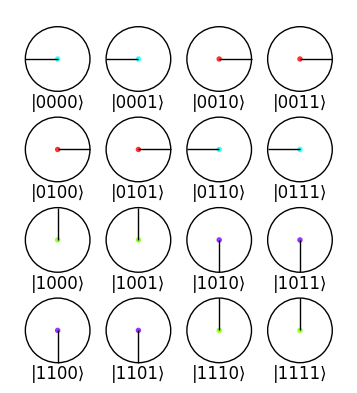

In [10]:
qs = QuantumState.from_statevector(sv)
qs.draw_circle_notation()

Let's try setting `use_zero_phase` to True:

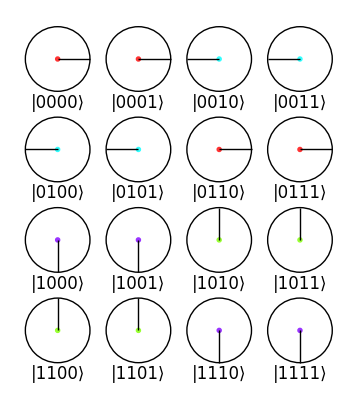

In [11]:
qs = QuantumState.from_statevector(sv)
qs.draw_circle_notation(use_zero_phase=True)

Printing can provide more information about the quantum state:

In [12]:
print(qs)

Amplitudes: [-0.25+1.5308085e-17j -0.25+1.5308085e-17j  0.25-1.5308085e-17j
  0.25-1.5308085e-17j  0.25-1.5308085e-17j  0.25-1.5308085e-17j
 -0.25+1.5308085e-17j -0.25+1.5308085e-17j  0.  +2.5000000e-01j
  0.  +2.5000000e-01j -0.  -2.5000000e-01j -0.  -2.5000000e-01j
 -0.  -2.5000000e-01j -0.  -2.5000000e-01j  0.  +2.5000000e-01j
  0.  +2.5000000e-01j], 
Num Qubits: 4, 
Dimension: 16, 
Global Phase: -4.898587196589412e-16, 
Relative Phase: [3.1415926535897936, 3.1415926535897936, 4.286263797015735e-16, 4.286263797015735e-16, 4.286263797015735e-16, 4.286263797015735e-16, 3.1415926535897936, 3.1415926535897936, 1.570796326794897, 1.570796326794897, -1.5707963267948961, -1.5707963267948961, -1.5707963267948961, -1.5707963267948961, 1.570796326794897, 1.570796326794897], 
Probabilities: [0.06250000000000003, 0.06250000000000003, 0.06250000000000003, 0.06250000000000003, 0.06250000000000003, 0.06250000000000003, 0.06250000000000003, 0.06250000000000003, 0.06250000000000003, 0.06250000000000

QuantumState can also be initialized from a string:

Amplitudes: [(1+0j), 0j], 
Num Qubits: 1, 
Dimension: 2, 
Global Phase: 0.0, 
Relative Phase: [0.0, 0.0], 
Probabilities: [1.0, 0.0], 
Phases: [0.0, 0.0]


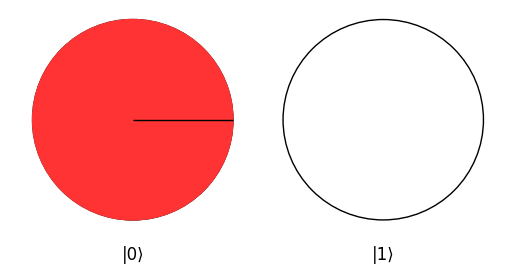

In [13]:
qs = QuantumState.from_string('[ 1+0j, 0+0j ]')
print(qs)
qs.draw_circle_notation()

It can also be initialized from a list of complex numbers:

Amplitudes: [(0.7071067811865475+0j), 0.7071067811865475j], 
Num Qubits: 1, 
Dimension: 2, 
Global Phase: 1.5707963267948966, 
Relative Phase: [-1.5707963267948966, 0.0], 
Probabilities: [0.4999999999999999, 0.4999999999999999], 
Phases: [0.0, 1.5707963267948966]


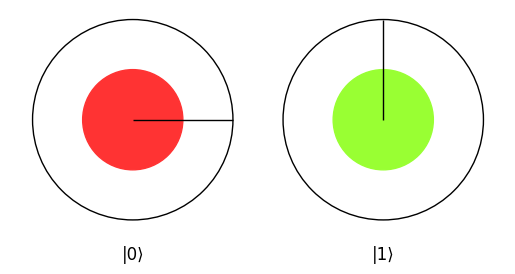

In [14]:
complex_number_0 = complex(1 / np.sqrt(2), 0)  # Amplitude for |0⟩
complex_number_1 = complex(0, 1 / np.sqrt(2))  # Amplitude for |1⟩

combined_amplitudes = [complex_number_0, complex_number_1]

qs = QuantumState.from_complex_numbers(combined_amplitudes)
print(qs)
qs.draw_circle_notation()

Error example showing what happens is a state vector is wrong:

In [17]:
complex_number = complex(0.707, 0.707)  # Example complex number
qs = QuantumState.from_complex_numbers([complex_number, complex_number])

QuantumError: Invalid quantum state.